In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# data 확인
- train
- test

- `pd.options.display` 

In [2]:
# pd.options.display.max_rows = 9999 
# train = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
train = pd.read_csv('train.csv')
train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
# test = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip')
test = pd.read_csv('test.csv')
test.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## data type 확인
- date type이 int, float가 아니면 학습이 안 된다.
- date의 경우 'object'이므로 int나 float로 바꿔줘야 한다.

In [4]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

- `pd.to_datetime()` 으로 type 변경가능

In [5]:
train['Date'] = pd.to_datetime(train['Date'])

In [6]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [7]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['Week'] = train['Date'].dt.week

C:\Users\SSAFY_~1\AppData\Local\Temp/ipykernel_26092/4263036626.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['Week'] = train['Date'].dt.week


In [8]:
test['Date'] = pd.to_datetime(test['Date'])

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
test['Week'] = test['Date'].dt.week

C:\Users\SSAFY_~1\AppData\Local\Temp/ipykernel_26092/1967278737.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['Week'] = test['Date'].dt.week


In [9]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day,Week
0,1,1,2010-02-05,24924.50,False,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,2010,2,12,6
2,1,1,2010-02-19,41595.55,False,2010,2,19,7
3,1,1,2010-02-26,19403.54,False,2010,2,26,8
4,1,1,2010-03-05,21827.90,False,2010,3,5,9
...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2012,9,28,39
421566,45,98,2012-10-05,628.10,False,2012,10,5,40
421567,45,98,2012-10-12,1061.02,False,2012,10,12,41
421568,45,98,2012-10-19,760.01,False,2012,10,19,42


# 시각화 tool 
- matplotlib
- sns

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SSAFY_eunseong\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

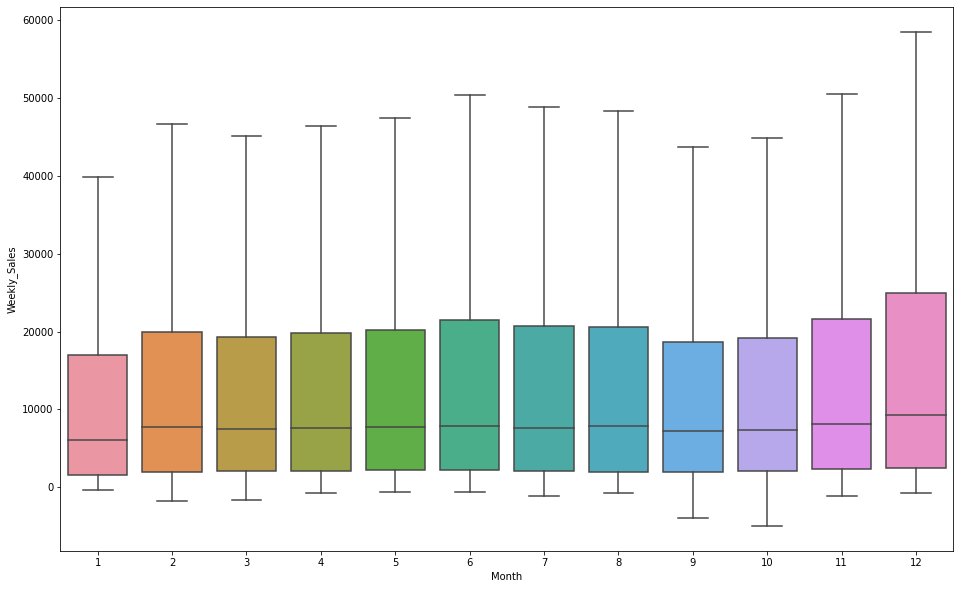

In [11]:
plt.figure(figsize = (16, 10))  #표 사이즈
sns.boxplot(train['Month'], train['Weekly_Sales'], showfliers = False) 

C:\Users\SSAFY_eunseong\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

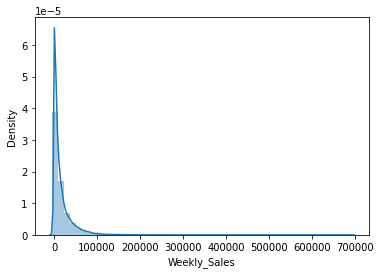

In [12]:
sns.distplot(train['Weekly_Sales'])

# 학습 데이터 준비
- train
    - Date : year, month, day, week로 column에 추가해줬기 때문에 drop
    - Weekly_sales : 정답 데이터이기 때문에 drop
- test
    - Date : train과 똑같이 Date drop

In [13]:
train2 = train.drop(columns = ['Date', 'Weekly_Sales'])
train2.head(3)

,Store,Dept,IsHoliday,Year,Month,Day,Week
0,1,1,False,2010,2,5,5
1,1,1,True,2010,2,12,6
2,1,1,False,2010,2,19,7


In [14]:
test2 = test.drop(columns = 'Date')
test2.head(3)

,Store,Dept,IsHoliday,Year,Month,Day,Week
0,1,1,False,2012,11,2,44
1,1,1,False,2012,11,9,45
2,1,1,False,2012,11,16,46


# 모델 학습
- 회귀 문제이기 떄문에 Regressor를 import 해준다
- `.fit(학습데이터, 정답데이터)`

In [15]:
from sklearn.ensemble import RandomForestRegressor 

In [16]:
rf = RandomForestRegressor(n_jobs = -1)
# 모델 학습
rf.fit(train2, train['Weekly_Sales'])

RandomForestRegressor(n_jobs=-1)

In [17]:
result = rf.predict(test2)

result

array([36632.425 , 20671.845 , 19348.5675, ...,   743.8224,   778.8573,
         669.7754])

# 제출 파일 만들기


In [18]:
# sub = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')
# sub

In [19]:
# sub['Weekly_Sales'] = result
# sub

In [20]:
# sub.to_csv('sub1.csv', index = 0)